# Visualización de Datos

En este notebook, creamos y personalizamos gráficos que representan adecuadamente los datos del dataset `House Prices: Advanced Regression Techniques`.

## Objetivos
- Generar gráficos variados que muestren diferentes aspectos del dataset.
- Realizar agrupamientos y agregaciones para visualizar ciertas variables y sus interacciones.
- Justificar la creación de cada gráfico y la elección de las técnicas de visualización utilizadas.


## Carga del Dataset Enriquecido


In [11]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Cargar el dataset enriquecido
train_df = pd.read_csv('data/processed/train_enriched.csv')

## Visualización de la Distribución de Precios de Venta


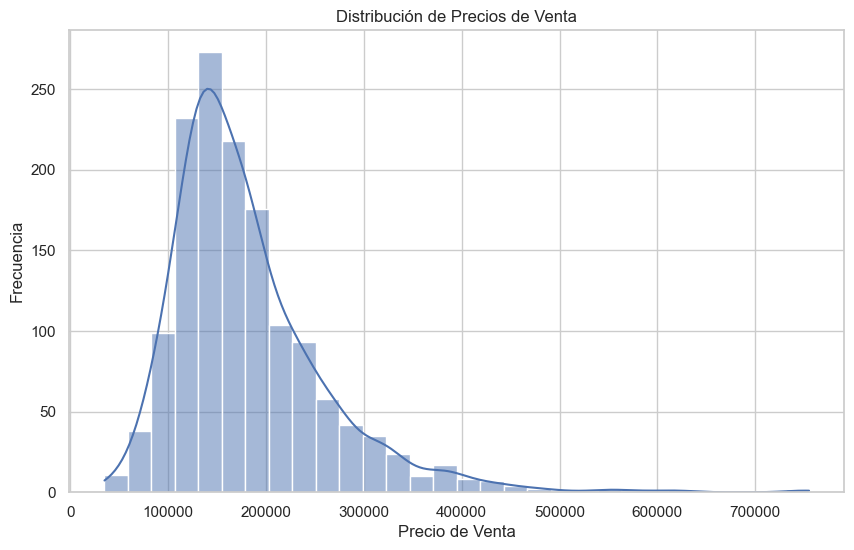

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], bins=30, kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

## Visualización de la Relación entre Espacio Total y Precio de Venta


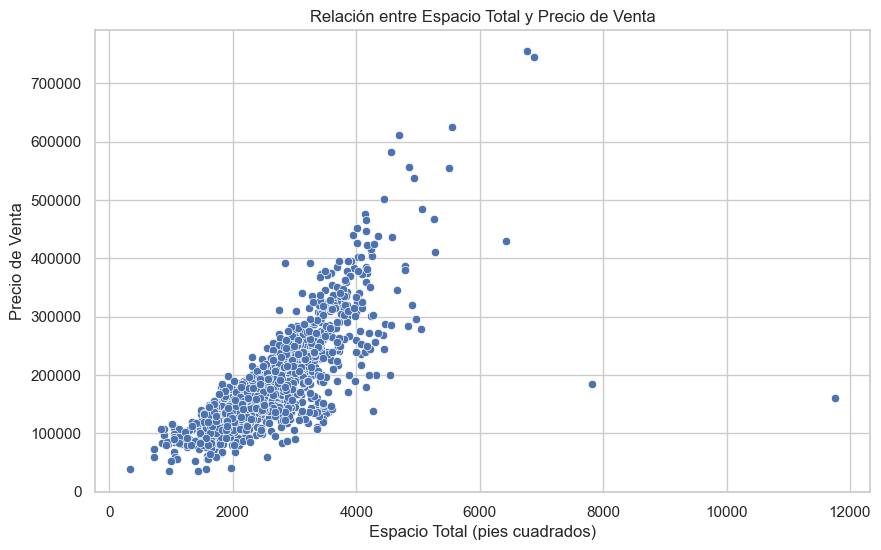

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSF', y='SalePrice', data=train_df)
plt.title('Relación entre Espacio Total y Precio de Venta')
plt.xlabel('Espacio Total (pies cuadrados)')
plt.ylabel('Precio de Venta')
plt.show()